In [1]:
from deap import gp, creator, base, tools, algorithms
import operator
import random
import math
import numpy
from mnist import MNIST
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage as scipy 
import random
import skimage.feature as skimage
from skimage.measure import block_reduce 
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from skimage.feature import SIFT

In [2]:
MAX_GENERATIONS = 50
POPULATION_SIZE = 500
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.19
ELITIIM_RATE = 0.01
TOURNAMENT_SIZE = 7
TREE_DEPTH = 2, 6
MAX_TREE_DEPTH = 8
HOF_SIZE = 10

In [3]:
def show(img):
    plt.imshow(img)
    plt.show()
dataset = MNIST('dataset', return_type='numpy')
train_images, train_labels = dataset.load_training()
test_images, test_labels = dataset.load_testing()
train_images = train_images.reshape(len(train_images),28,28).astype('uint8') / 255
test_images = test_images.reshape(len(test_images),28,28).astype('uint8') / 255
train_set = train_images[:1000]
test_set = test_images[:100]


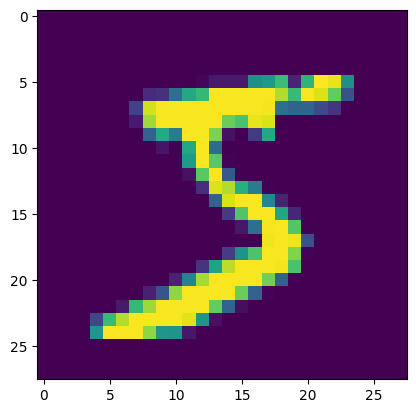

In [4]:
src = train_images[0]
plt.imshow(src)
plt.show()

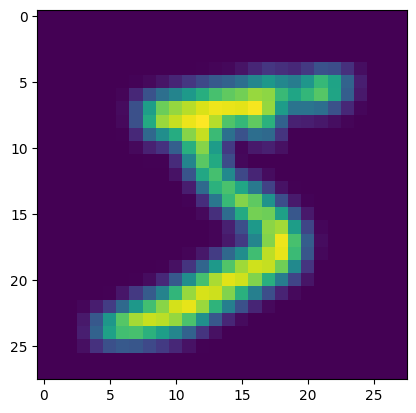

In [5]:
def gau(img, sigma):
    return cv.GaussianBlur(img, (3,3), sigma)
dst = gau(src, 1.)
plt.imshow(dst)
plt.show()

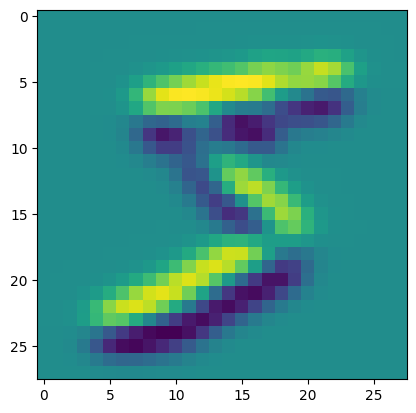

In [6]:
def gaussian_derivates_filter(img, sigma, order1, order2):
    return scipy.gaussian_filter(img, sigma, (order1, order2))
dst = gaussian_derivates_filter(src, 1, 1, 0)
plt.imshow(dst)
plt.show()

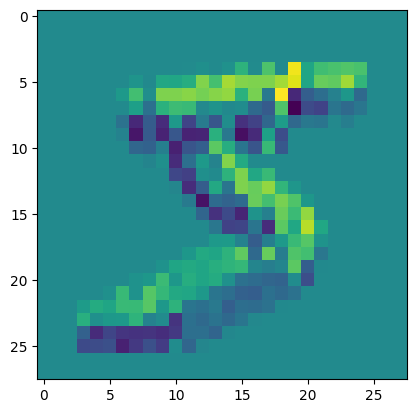

In [7]:
def gabor_filter(img, theta, lambd): 
    kernel = cv.getGaborKernel((3,3), 10, theta, lambd, 0)
    return cv.filter2D(img, cv.CV_64F, kernel)
dst = gabor_filter(src, 1, 1)
plt.imshow(dst)
plt.show()

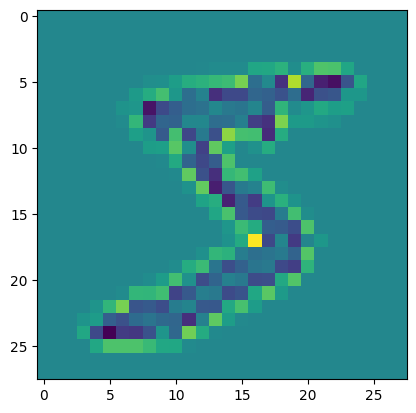

In [8]:

dst = cv.Laplacian(src, cv.CV_64F)
plt.imshow(dst)
plt.show()

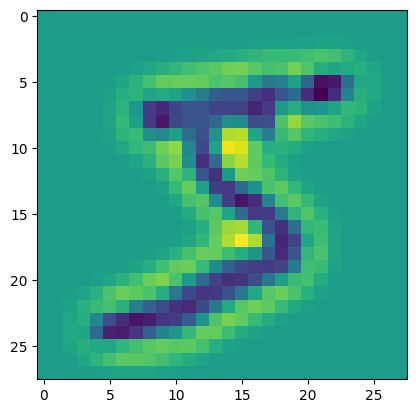

In [9]:
dst = scipy.gaussian_laplace(src, 1)
plt.imshow(dst)
plt.show()

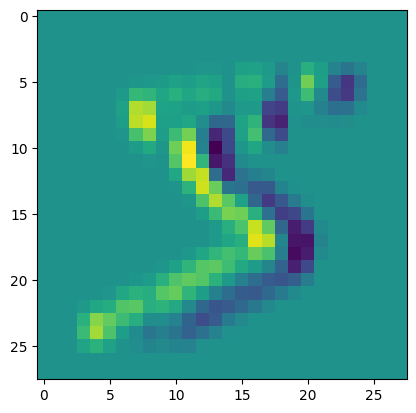

In [10]:
dst = scipy.sobel(src)
plt.imshow(dst)
plt.show()

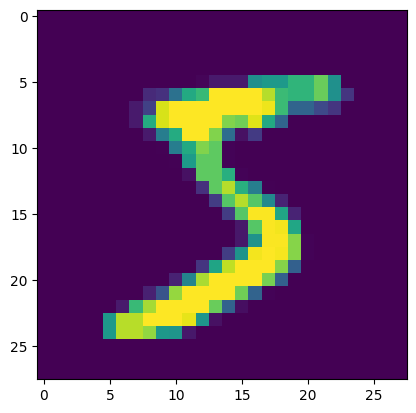

In [11]:
dst = scipy.median_filter(src, 3)
plt.imshow(dst)
plt.show()

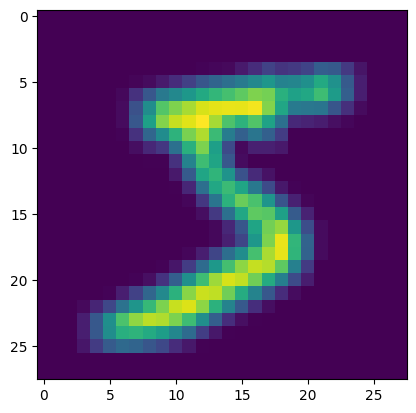

In [12]:
dst = cv.blur(src, (3,3))
plt.imshow(dst)
plt.show()

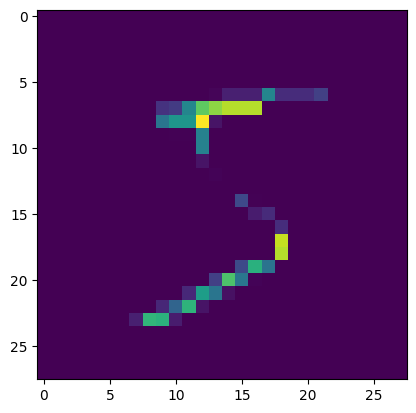

In [13]:
dst = scipy.minimum_filter(src, 3)
plt.imshow(dst)
plt.show()

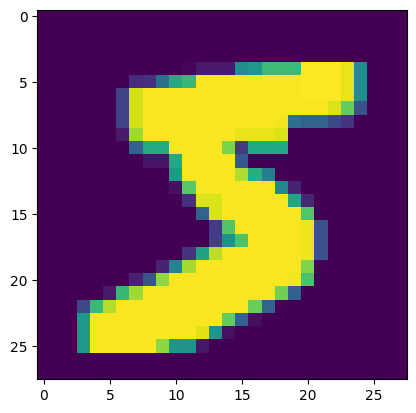

In [14]:
dst = scipy.maximum_filter(src, 3)
plt.imshow(dst)
plt.show()

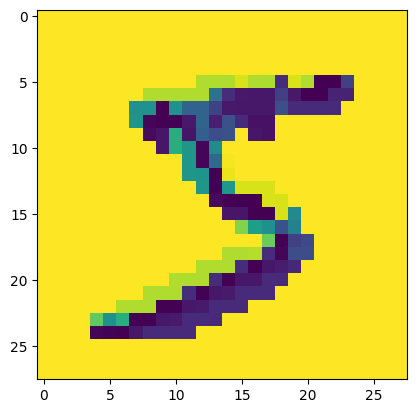

In [15]:
dst = skimage.local_binary_pattern(src, 8, 1.5)
plt.imshow(dst)
plt.show()

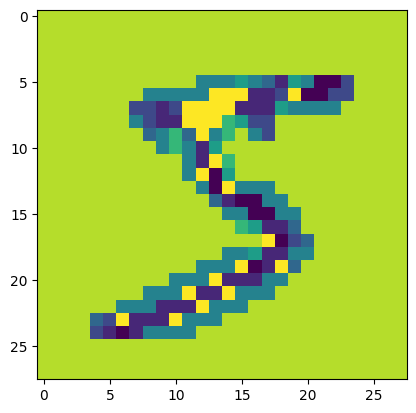

[0.01658163 0.03826531 0.01785714 0.01020408 0.08035714 0.01020408
 0.00765306 0.         0.78826531 0.03061224]


In [16]:
def lbp(img, show=False):
    dst = skimage.local_binary_pattern(img, 8, 1.5, method="uniform")
    if show:
        plt.imshow(dst)
        plt.show()
    (hist, _) = np.histogram(dst.ravel(),
        bins=np.arange(0, 8 + 3),
        range=(0, 8 + 2))
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-7)
    return hist
print(lbp(src, True))

[0.04773369 0.         0.0095332  0.         0.         0.
 0.         0.         0.         0.         0.         0.04614338
 0.26506846 0.26947296 0.         0.         0.         0.
 0.0266228  0.03861278 0.18029928 0.25170204 0.26947296 0.06119523
 0.05684657 0.         0.04233728 0.00298668 0.         0.
 0.         0.         0.         0.         0.         0.05084234
 0.07780181 0.04841331 0.05940286 0.04667002 0.13647971 0.22646801
 0.26947296 0.26947296 0.02915187 0.0300327  0.08689329 0.
 0.04061981 0.09789996 0.06497558 0.26947296 0.         0.
 0.00912596 0.03638296 0.15130781 0.05556856 0.06943678 0.
 0.         0.         0.         0.         0.         0.26947296
 0.26947296 0.13275565 0.04242976 0.         0.         0.
 0.22540238 0.05385562 0.15709998 0.17664125 0.04705851 0.
 0.13346618 0.         0.13220393]


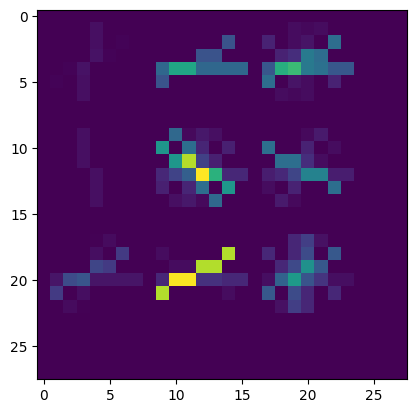

In [17]:
def hog(img, f):
    vec, res = skimage.hog(img, visualize=True, feature_vector=True)
    return res if f else vec
print(hog(src, False))
dst = hog(src, True)
plt.imshow(dst)
plt.show()

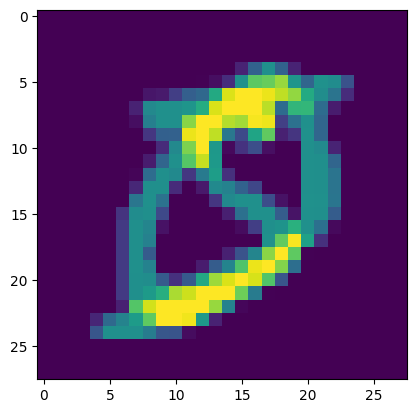

In [18]:
dst = cv.addWeighted(src, 0.1, train_images[1], 0.1, 0)
plt.imshow(dst)
plt.show()

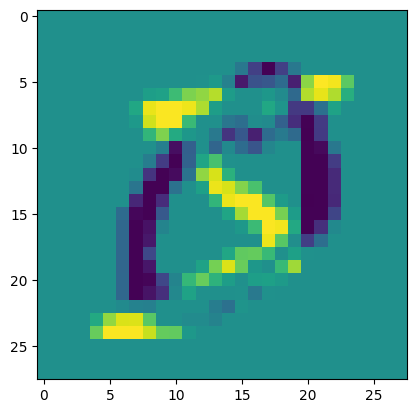

In [19]:
def subWeighted(src1, alpha, src2, beta):
    return cv.addWeighted(src1, alpha, src2, -beta, 0)
dst = subWeighted(src, 0.1, train_images[1], 0.1)
plt.imshow(dst)
plt.show()

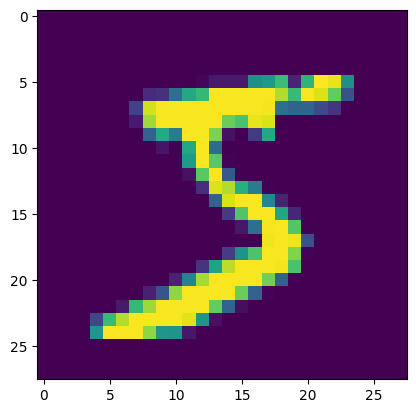

In [20]:
relu = np.vectorize(lambda x: 0 if x<0 else x)
dst = relu(src)
plt.imshow(dst)
plt.show()

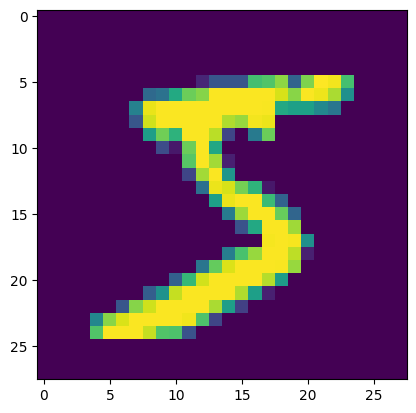

In [21]:
sqrt = np.vectorize(lambda x: 1 if x<0 else math.sqrt(x))
dst = sqrt(src)
plt.imshow(dst)
plt.show()

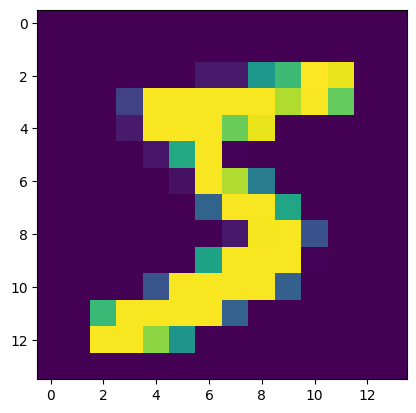

In [22]:
#max pooling
def maxp(img, k1, k2):
    return block_reduce(img, (k1,k2), np.max)
dst = maxp(src, 2,2)
plt.imshow(dst)
plt.show()

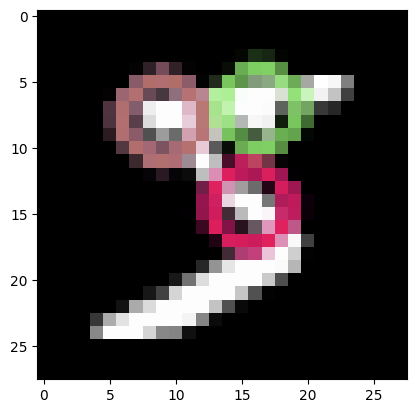

[ 33.   0.   0.   0.   0.   0.   0.  10. 144.   0.   0.   0.   0.   0.
   0.  79.  94.   1.   3.  20.  82.  70.   3.  28.   0.   0.   6.  22.
  60.  97.  79.  20.  70.   3.   0.   0.   0.   0.   0.  10. 144.  40.
  19.  13.   0.   0.   0.  43.  66.  13.  89. 144.  13.  15.   1.   7.
   0.   0. 144. 124.   7.  24.  21.   2.  33.  21.   1.   0.   0.   0.
   0.   1.  92. 144. 112.  24.   0.   0.   0.   1.   5.  19. 125. 144.
   4.   0.   0.   0.   0.   0.  64.  71.   1.   0.   0.   0.   0.   4.
   1.   0.   0.   0.   0.   0.   0.  15.  30.   2.   0.   0.   0.   0.
   0.   1.  26.  15.   0.   0.   0.   0.   0.   0.   1.   4.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.   0.   0.   0.   0.
   0.   2.  23.  23.   0.   0.   0.   0.   0.  22.  27.   3.   0.   0.
   0.   0.   0.   5.   0.   0.  22.   1.   0.   0.   0.   0.   0.  17.
  95.   4.   0.   0.   0.  14.  72. 145.  10.   0.   0.   0.   0. 145.
 113.  36.   0.   0.   0.   0.   3. 114.   2.   0.  50.   4.   0.   0.
   0. 

In [23]:
def sift(img, show=False):
    sift = cv.SIFT_create(128)
    kp, des = sift.detectAndCompute((img*255).astype(np.uint8), None)
    if show:
        plt.imshow(cv.drawKeypoints((img*255).astype(np.uint8),kp,(img*255).astype(np.uint8)))
        plt.show()
    if des is None:
        return []
    return des.ravel()
print(sift(src, True))

In [24]:
#def sift(img):
#    descriptor_extractor = SIFT()
#    descriptor_extractor.detect_and_extract(img)
#    return descriptor_extractor.descriptors.ravel()

In [25]:
def root(*v: np.ndarray):
    return np.concatenate(v)
print(root(hog(src, False), lbp(src), sift(src)))

[4.77336897e-02 0.00000000e+00 9.53319660e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.61433848e-02
 2.65068459e-01 2.69472965e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.66228040e-02 3.86127786e-02
 1.80299282e-01 2.51702035e-01 2.69472965e-01 6.11952258e-02
 5.68465659e-02 0.00000000e+00 4.23372816e-02 2.98667733e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.08423382e-02
 7.78018071e-02 4.84133092e-02 5.94028574e-02 4.66700179e-02
 1.36479705e-01 2.26468012e-01 2.69472965e-01 2.69472965e-01
 2.91518711e-02 3.00326991e-02 8.68932921e-02 0.00000000e+00
 4.06198126e-02 9.78999593e-02 6.49755799e-02 2.69472965e-01
 0.00000000e+00 0.00000000e+00 9.12595817e-03 3.63829582e-02
 1.51307809e-01 5.55685639e-02 6.94367842e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.694729

In [26]:
def feacon(*imgs: np.ndarray):
    return np.concatenate(imgs).ravel()
src2 = cv.addWeighted(src, 0.1, train_images[1], 0.1, 0)
print(feacon(src, src2, train_images[1]))

[0. 0. 0. ... 0. 0. 0.]


In [27]:
sigma = type('sigma', (), {})
order = type('order', (), {})
theta = type('theta', (), {})
lambd = type('lambd', (), {})
n_type = type('n', (), {})
kernel = type('kernel', (), {})
vector = type('vector', (), {})
output = type("output", (), {})

In [28]:
toolbox = base.Toolbox()
toolbox.register("lap", cv.Laplacian, ddepth=cv.CV_64F)
toolbox.register("log1", scipy.gaussian_laplace, sigma=1)
toolbox.register("log2", scipy.gaussian_laplace, sigma=2)
toolbox.register("sobel", cv.Sobel, ddepth=cv.CV_64F, dx=1, dy=1)
toolbox.register("sobelx", cv.Sobel, ddepth=cv.CV_64F, dx=1, dy=0)
toolbox.register("sobely", cv.Sobel, ddepth=cv.CV_64F, dx=0, dy=1)
toolbox.register("med", scipy.median_filter, size=3)
toolbox.register("mean", cv.blur, ksize=(3,3))
toolbox.register("min", scipy.minimum_filter, size=3)
toolbox.register("max", scipy.maximum_filter, size=3)
toolbox.register("LBP_F", skimage.local_binary_pattern, P=8, R=1.5)
toolbox.register("HOG_F", hog, f=True)
toolbox.register("HOG", hog, f=False)
toolbox.register("W_add", cv.addWeighted, gamma=0)

In [29]:
feacon(toolbox.HOG(src), sift(src), lbp(src), lbp(src))

array([4.77336897e-02, 0.00000000e+00, 9.53319660e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.61433848e-02,
       2.65068459e-01, 2.69472965e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.66228040e-02, 3.86127786e-02,
       1.80299282e-01, 2.51702035e-01, 2.69472965e-01, 6.11952258e-02,
       5.68465659e-02, 0.00000000e+00, 4.23372816e-02, 2.98667733e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.08423382e-02,
       7.78018071e-02, 4.84133092e-02, 5.94028574e-02, 4.66700179e-02,
       1.36479705e-01, 2.26468012e-01, 2.69472965e-01, 2.69472965e-01,
       2.91518711e-02, 3.00326991e-02, 8.68932921e-02, 0.00000000e+00,
       4.06198126e-02, 9.78999593e-02, 6.49755799e-02, 2.69472965e-01,
       0.00000000e+00, 0.00000000e+00, 9.12595817e-03, 3.63829582e-02,
      

In [30]:
pset = gp.PrimitiveSetTyped("main", [np.ndarray], output, prefix = "Image")

In [31]:
#Filtering functions
pset.addPrimitive(gau, [np.ndarray, sigma], np.ndarray, "Gau")
pset.addPrimitive(gaussian_derivates_filter, [np.ndarray, sigma, order, order], np.ndarray, "GauD")
pset.addPrimitive(gabor_filter, [np.ndarray, theta, lambd], np.ndarray, "Gabor")
pset.addPrimitive(toolbox.lap, [np.ndarray], np.ndarray, "Lap")
pset.addPrimitive(toolbox.log1, [np.ndarray], np.ndarray, "LoG1")
pset.addPrimitive(toolbox.log2, [np.ndarray], np.ndarray, "LoG2")
pset.addPrimitive(toolbox.sobel, [np.ndarray], np.ndarray, "Sobel")
pset.addPrimitive(toolbox.sobelx, [np.ndarray], np.ndarray, "SobelX")
pset.addPrimitive(toolbox.sobely, [np.ndarray], np.ndarray, "SobelY")
pset.addPrimitive(toolbox.med, [np.ndarray], np.ndarray, "Med")
pset.addPrimitive(toolbox.mean, [np.ndarray], np.ndarray, "Mean")
pset.addPrimitive(toolbox.min, [np.ndarray], np.ndarray, "Min")
pset.addPrimitive(toolbox.max, [np.ndarray], np.ndarray, "Max")
pset.addPrimitive(toolbox.LBP_F, [np.ndarray], np.ndarray, "LBP_F")
pset.addPrimitive(toolbox.HOG_F, [np.ndarray], np.ndarray, "HOG_F")
pset.addPrimitive(toolbox.W_add, [np.ndarray, n_type, np.ndarray, n_type], np.ndarray, "W_Add")
pset.addPrimitive(subWeighted, [np.ndarray, n_type, np.ndarray, n_type], np.ndarray, "W_Sub")
pset.addPrimitive(relu, [np.ndarray], np.ndarray, "ReLU")
pset.addPrimitive(sqrt, [np.ndarray], np.ndarray, "Sqrt")

In [32]:
#Pooling functions
pset.addPrimitive(maxp, [np.ndarray, kernel, kernel], np.ndarray, "MaxP")

In [33]:
#Feature Extraction
pset.addPrimitive(sift, [np.ndarray], vector, "SIFT")
pset.addPrimitive(lbp, [np.ndarray], vector, "LBP")
pset.addPrimitive(toolbox.HOG, [np.ndarray], vector, "HOG")

In [34]:
#Concatenation Functionas
pset.addPrimitive(root, [vector, vector], output, "Root2")
pset.addPrimitive(root, [vector, vector, vector], output, "Root3")
pset.addPrimitive(root, [vector, vector, vector, vector], output, "Root4")
pset.addPrimitive(feacon, [np.ndarray, np.ndarray], output, "FeaCon2")
pset.addPrimitive(feacon, [np.ndarray, np.ndarray, np.ndarray], output, "FeaCon3")

In [35]:
#Ephemeral Constants
pset.addEphemeralConstant("sigma", lambda: random.randint(1, 3), sigma)
pset.addEphemeralConstant("order", lambda: random.randint(0, 2), order)
pset.addEphemeralConstant("theta", lambda: random.choice([i for i in np.arange(0, 7*math.pi/8, math.pi/8)]), theta)
pset.addEphemeralConstant("lambda", lambda: pow(math.sqrt(2), random.randint(0, 4))/(math.pi/2), lambd)
pset.addEphemeralConstant("n", lambda: random.random(), n_type)
pset.addEphemeralConstant("kernel", lambda: random.randint(1, 4), kernel)

In [36]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=TREE_DEPTH[0], max_=TREE_DEPTH[1])
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [75]:
def pad_array(arr):
    m = max(len(a) for a in arr)
    return np.array([list(a) + [0.] * (m - len(a)) for a in arr])

def evalInd(individual):
    func = toolbox.compile(expr=individual)
    #train
    vectors = []
    for img in train_set:
        temp = func(img)
        vectors.append(temp)
    norm_vectors = list(map(lambda vec: (vec-min(vec))/(max(vec)-min(vec)), vectors))
    norm_vectors = pad_array(norm_vectors)
    svm = LinearSVC()
    svm.fit(norm_vectors, train_labels[:len(vectors)])
    #test
    print(len(test_set))
    print(test_set[0])
    predictions = svm.predict(test_set)
    result = accuracy_score(test_labels[:len(test_set)], predictions)
    return result,

ind = "Root3(SIFT(MaxP(W_Sub(Image0, 0.453, Image0, 0.641), 4, 2)), HOG(W_Add(LoG2(Image0), 0.031, W_Sub(ReLU(SobelY(Image0)), 0.9, W_Add(LoG1(Image0), 0.206, GauD(Image0, 2, 0, 1), 0.776), 0.837), 0.837)), HOG(Lap(Image0)))"
print(evalInd(ind))


100
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.

ValueError: Found array with dim 3. LinearSVC expected <= 2.

In [54]:
src = train_set[0]
#print(src)
#show(relu(toolbox.sobelx(maxp(src, 2, 3))))
ind = "Root3(SIFT(MaxP(W_Sub(Image0, 0.453, Image0, 0.641), 4, 2)), HOG(W_Add(LoG2(Image0), 0.031, W_Sub(ReLU(SobelY(Image0)), 0.9, W_Add(LoG1(Image0), 0.206, GauD(Image0, 2, 0, 1), 0.776), 0.837), 0.837)), HOG(Lap(Image0)))"
#print(toolbox.compile(ind)(src))
print(evalInd(ind))
#print(eval("Root2(SIFT(Image0), HOG(SobelX(MaxP(Image0, 2, 3))))"))
#print(eval("Root2(HOG(Image0), HOG(LBP_F(Image0)))"))
#print(eval("FeaCon3(Mean(W_Sub(LoG1(LoG2(Gabor(Image0, 1.9634954084936207, 2.546479089470326))), Gabor(Sobel(Image0), Sobel(HOG_F(Image0)), HOG_F(Image0)), Image0, HOG_F(Image0))), HOG_F(ReLU(Med(Gau(GauD(Image0, 1, 0, 2), 3)))), Gabor(HOG_F(Gabor(LoG1(Min(Image0)), 0.0, 0.6366197723675814)), Min(Lap(Min(Sobel(Image0)))), Sobel(Lap(Min(GauD(Image0, 3, 1, 0))))))"))

1000


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1000,) + inhomogeneous part.

In [ ]:
ind = toolbox.individual()
print(ind)
print(evalInd(ind))

In [ ]:
toolbox.register("evaluate", eval)
toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=TREE_DEPTH[0], max_=TREE_DEPTH[1])
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=8))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=8))

In [ ]:
#print(pset.primitives)
#print(pset.terminals)
tipo = output
for prim in pset.primitives[tipo]:  
    print(prim.name)

In [ ]:
#main
random.seed(10)
pop = toolbox.population(n=POPULATION_SIZE)
hof = tools.HallOfFame(HOF_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

_, log = algorithms.eaSimple(
    pop, 
    toolbox, 
    CROSSOVER_RATE, 
    MUTATION_RATE, 
    MAX_GENERATIONS, 
    stats, 
    halloffame=hof
    )
print(log)
pop, stats, hof